In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks

def mean_filter_adaptive(signal,wdw):
    """Apply an adaptive mean filter to smooth the signal."""
    out = np.zeros(len(signal))
    out[0] = signal[0]
    out[-1] = signal[-1]

    for k in range(wdw//2,len(out)-wdw//2):
        out[k] = np.mean(signal[k-wdw//2:k]) #(k+wdw//2 + 1)

    for k in range(1,wdw//2):
        out[k] = np.mean(signal[:(2*k+1)])
        out[-(k+1)] = np.mean(signal[(-2*k-1):])

    return out

def process_file(file_path, prominence=0.1, smooth_window=100, xmin=0, xmax=7):
    """Process a file to detect peaks and generate plots."""
    data = pd.read_csv(file_path, delimiter='\t')

    x = data['time(s)']
    y = data['deflection(um)']
    y_lisse = mean_filter_adaptive(y.to_numpy(), smooth_window)
    peaks, properties = find_peaks(y_lisse, prominence=prominence, height=(xmin,xmax))

    #print(peaks)
    peak_times = x[peaks]
    peak_values = y_lisse[peaks]

    
    folder_name = os.path.basename(os.path.dirname(file_path))
    peak_df = pd.DataFrame({'file_path':file_path, 'folder_name': folder_name, 'time(s)': peak_times, 'peak_deflection(um)': peak_values})
    
    plt.plot(x, y)
    plt.plot(x,y_lisse,color="k")
    plt.plot(peak_times, peak_values, 'ro',markersize=5)  

    sns.despine(right=True, top=True, left=False, bottom=False)

    plt.xlabel('time(s)')
    plt.ylabel('deflection(um)')

    title = f'Peaks from {file_path}'
    plt.title(title)
    plt.savefig(output_folder + f"{folder_name}.png",bbox_inches="tight",dpi=300)
    plt.show()
    
    return peak_df

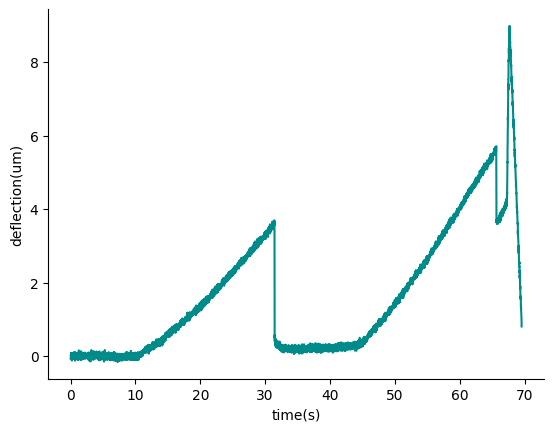

In [6]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

file_paths = ['C:/Users/phpue/Desktop/Git/Force/05_2024_Julien/240503Eimeria/240503_cell9/240503_cell9_indCycle1data.txt']

# Iterate over the file paths
for i, file_path in enumerate(file_paths):
    # Load data from the current file
    data = pd.read_csv(file_path, delimiter='\t')  # Assuming tab-separated values

    # Create a new figure and axis for each file
    fig, ax = plt.subplots()

    # Plot the linear force curve using Seaborn
    sns.lineplot(x='time(s)', y='deflection(um)', data=data, ax=ax, color='darkcyan')
    sns.despine(right=True, top = True, left=False, bottom=False)
    
    plt.savefig("plot.svg",bbox_inches="tight",dpi=1800, transparent=True)
